In [1]:
%pylab inline

# line-oriented magic
# cell-oriented magic

Populating the interactive namespace from numpy and matplotlib


In [2]:
def return_on_investment(principal, interest_rate, number_of_years):
    return principal * e ** (interest_rate * number_of_years)

In [3]:
principal = 250
interest_rate = .034
tstart = 0.0
tend = 5.0
npoints = 6

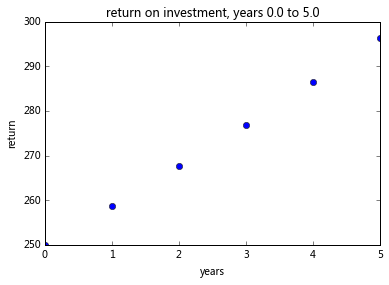

In [4]:
tvalues = linspace(tstart, tend, npoints)
amount_values = return_on_investment(principal, interest_rate, tvalues)

plot(tvalues, amount_values, 'o')
title('return on investment, years {} to {}'.format(tstart, tend))
xlabel('years')
ylabel('return')
tstart += tend
tend += tend

In [5]:
# %pylab inline
# it imports `numpy` and `matplotlib`
# and sets up the notebook for inline plots

In [6]:
# %pylab
# ipython will open a new window with the plot
# this window is interactive and you can resize the graph
# move it and save it to a file from here

In [7]:
# %timeit
# records the time it takes to run a line of python code
%timeit return_on_investment(principal, interest_rate, tvalues)

The slowest run took 8.02 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.36 µs per loop


In [8]:
principal = 250
interest_rate = [0.0001 * i for i in range(100000)]
tfinal = 10

In [9]:
%%timeit
returns = []
for r in interest_rate:
    returns.append(return_on_investment(principal, r, tfinal))

10 loops, best of 3: 32.2 ms per loop


In [10]:
principal = 250
interest_rate = arange(0, 10, 0.0001)
tfinal = 10

In [11]:
%%timeit
returns = return_on_investment(principal, interest_rate, tfinal)

100 loops, best of 3: 2.52 ms per loop


In [12]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%

In [13]:
import math

def sin_area(a, b, nintervals):
    dx = (b - a) / nintervals
    sleft = 0.0
    sright = 0.0
    for i in range(nintervals):
        sleft += math.sin(a + i * dx)
        sright += math.sin(a + (i + 1) * dx)
    return dx * (sright + sleft) / 2

In [14]:
sin_area(0, pi, 10000)

1.9999999835506606

In [15]:
%timeit sin_area(0, pi, 10000)

100 loops, best of 3: 4.89 ms per loop


In [16]:
%load_ext Cython

In [17]:
%%cython
cimport cython
from libc.math cimport sin

@cython.cdivision(True)
def sin_area_cython(a, b, nintervals):
    cdef double dx, sleft, sright
    cdef int i
    dx = (b - a) / nintervals
    sleft = 0.0
    sright = 0.0
    for i in range(nintervals):
        sleft += sin(a + i * dx)
        sright += sin(a + (i + 1) * dx)
    return dx * (sright + sleft) /2

In [18]:
sin_area_cython(0, pi, 10000)

1.9999999835506606

In [19]:
%timeit sin_area_cython(0, pi, 10000)

1000 loops, best of 3: 955 µs per loop


In [20]:
def sin_area_numpy(a, b, nintervals):
    dx = (b - a) / nintervals
    xvalues = arange(a, b, dx)
    sleft = sum(sin(xvalues))
    sright = sum(sin(xvalues + dx))
    return dx * (sleft + sright) / 2

In [21]:
%timeit sin_area_numpy(0, pi, 10000)

1000 loops, best of 3: 230 µs per loop


In [22]:
# saving the notebook
# default interval is 2 mins
# %autosave 300
# in seconds
# disbale autosave
# %autosave 0

In [23]:
# convert notebook to other formats
# ipython nbconvert ch2.ipynb --to slikes

In [24]:
# running shell commands
# !dir
# !ls
# !cc hello.c -o hello

In [25]:
# %cd
# %pwd
# %ls
# %mkdir
# %rmdir
# %echo
# %alias

In [26]:
%echo $PATH

ERROR: Line magic function `%echo` not found.


In [27]:
%run lorenz.py

In [28]:
# %load lorenz.py

'''running python scripts'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

def make_lorenz(sigma, r, b):
    '''make_lorenz'''
    def func(statevec, t):
        '''func'''
        x, y, z = statevec
        return [sigma * (y - x),
                r * x - y - x * z,
                x * y - b * z]
    return func

def plot1():
    '''plot1'''
    lorenz_eq = make_lorenz(10., 28., 8. / 3.)
    tmax = 50
    tdelta = 0.005
    tvalues = np.arange(0, tmax, tdelta)
    ic = np.array([0.0, 1.0, 0.0])
    sol = odeint(lorenz_eq, ic, tvalues)

    x, y, z = np.array(zip(*sol))

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z, lw=1, color='red')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    plt.show()


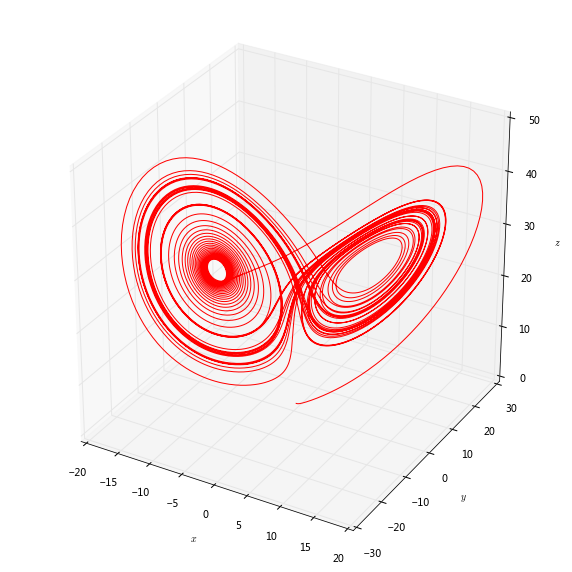

In [29]:
# %load does not immediately run the script
# but places its code in a cell
plot1()

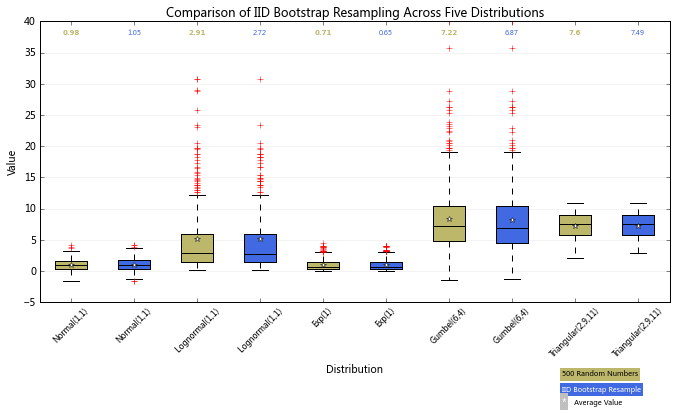

In [30]:
# %load http://matplotlib.org/mpl_examples/pylab_examples/boxplot_demo2.py
"""
Thanks Josh Hemann for the example
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


# Generate some data from five different probability distributions,
# each with different characteristics. We want to play with how an IID
# bootstrap resample of the data preserves the distributional
# properties of the original sample, and a boxplot is one visual tool
# to make this assessment
numDists = 5
randomDists = ['Normal(1,1)',' Lognormal(1,1)', 'Exp(1)', 'Gumbel(6,4)',
              'Triangular(2,9,11)']
N = 500
norm = np.random.normal(1,1, N)
logn = np.random.lognormal(1,1, N)
expo = np.random.exponential(1, N)
gumb = np.random.gumbel(6, 4, N)
tria = np.random.triangular(2, 9, 11, N)

# Generate some random indices that we'll use to resample the original data
# arrays. For code brevity, just use the same random indices for each array
bootstrapIndices = np.random.random_integers(0, N-1, N)
normBoot = norm[bootstrapIndices]
expoBoot = expo[bootstrapIndices]
gumbBoot = gumb[bootstrapIndices]
lognBoot = logn[bootstrapIndices]
triaBoot = tria[bootstrapIndices]

data = [norm, normBoot,  logn, lognBoot, expo, expoBoot, gumb, gumbBoot,
       tria, triaBoot]

fig, ax1 = plt.subplots(figsize=(10,6))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
              alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Comparison of IID Bootstrap Resampling Across Five Distributions')
ax1.set_xlabel('Distribution')
ax1.set_ylabel('Value')

# Now fill the boxes with desired colors
boxColors = ['darkkhaki','royalblue']
numBoxes = numDists*2
medians = range(numBoxes)
for i in range(numBoxes):
  box = bp['boxes'][i]
  boxX = []
  boxY = []
  for j in range(5):
      boxX.append(box.get_xdata()[j])
      boxY.append(box.get_ydata()[j])
  boxCoords = zip(boxX,boxY)
  # Alternate between Dark Khaki and Royal Blue
  k = i % 2
  boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
  ax1.add_patch(boxPolygon)
  # Now draw the median lines back over what we just filled in
  med = bp['medians'][i]
  medianX = []
  medianY = []
  for j in range(2):
      medianX.append(med.get_xdata()[j])
      medianY.append(med.get_ydata()[j])
      plt.plot(medianX, medianY, 'k')
      medians[i] = medianY[0]
  # Finally, overplot the sample averages, with horizontal alignment
  # in the center of each box
  plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
           color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes+0.5)
top = 40
bottom = -5
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=np.repeat(randomDists, 2))
plt.setp(xtickNames, rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes)+1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick,label in zip(range(numBoxes),ax1.get_xticklabels()):
   k = tick % 2
   ax1.text(pos[tick], top-(top*0.05), upperLabels[tick],
        horizontalalignment='center', size='x-small', weight=weights[k],
        color=boxColors[k])

# Finally, add a basic legend
plt.figtext(0.80, 0.08,  str(N) + ' Random Numbers' ,
           backgroundcolor=boxColors[0], color='black', weight='roman',
           size='x-small')
plt.figtext(0.80, 0.045, 'IID Bootstrap Resample',
backgroundcolor=boxColors[1],
           color='white', weight='roman', size='x-small')
plt.figtext(0.80, 0.015, '*', color='white', backgroundcolor='silver',
           weight='roman', size='medium')
plt.figtext(0.815, 0.013, ' Average Value', color='black', weight='roman',
           size='x-small')

plt.show()
